<a href="https://colab.research.google.com/github/karim-mammadov/SaiKet_Systems_Tasks/blob/main/Task_2_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2:**

**Exploratory Data Analysis (EDA) Description:**


Calculate and visually represent the overall
churn rate. Explore customer distribution by
gender, partner status, and dependent status.
Analyze tenure distribution and its relation
with churn. Investigate how churn varies
across different contract types and payment
methods.


**Import Libraries for EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set seaborn style for plots**

In [2]:
sns.set_style("whitegrid")

**Load Dataset**

In [3]:
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset  (3).csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**Fill missing values**

In [4]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

**Overall Churn Rate**

In [5]:
churn_rate = df['Churn'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")

Overall churn rate: 26.54%


**Visualize churn rate**

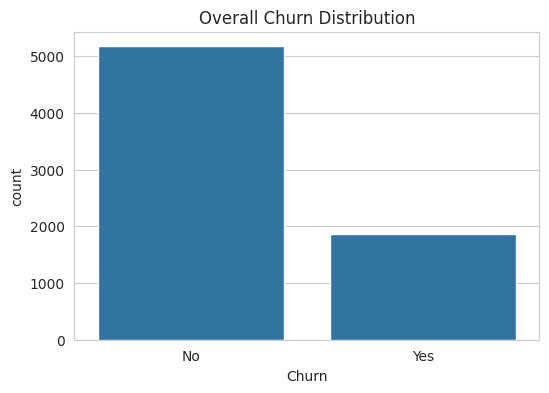

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Overall Churn Distribution")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

**Customer Distribution by Gender, Partner, and Dependents**

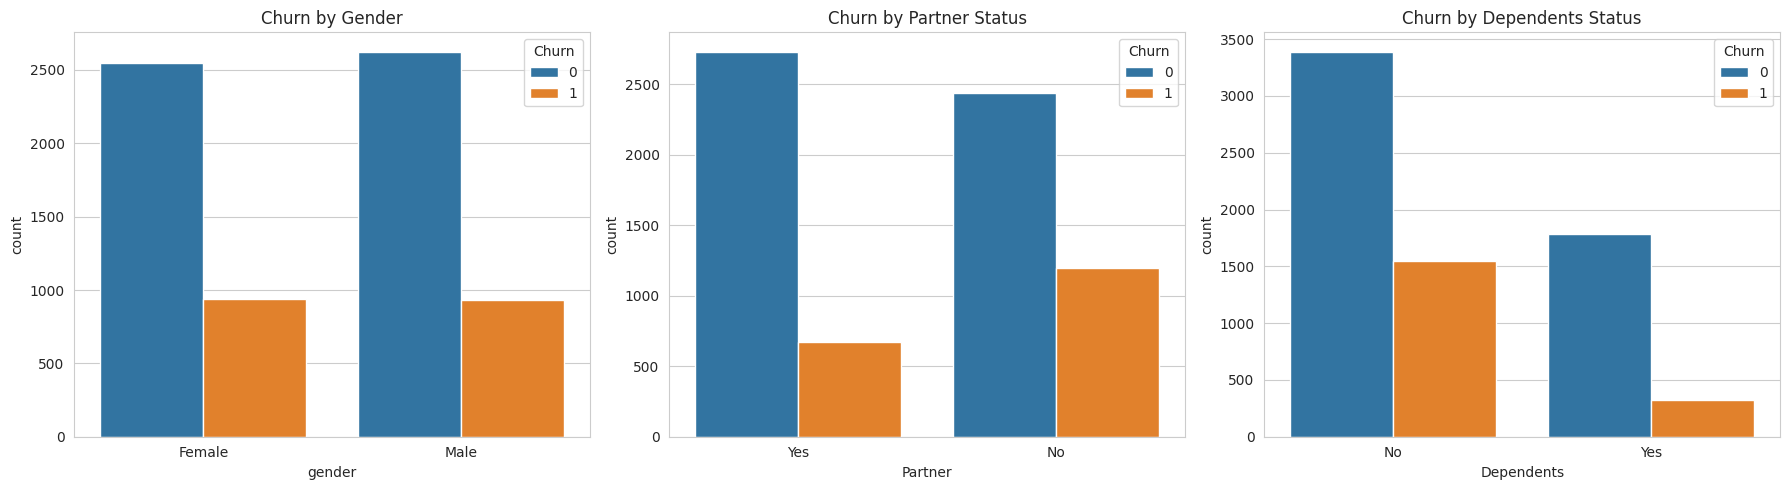

In [7]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")

plt.subplot(1,3,2)
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title("Churn by Partner Status")

plt.subplot(1,3,3)
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title("Churn by Dependents Status")

plt.tight_layout()
plt.show()

**Tenure Distribution and Churn**

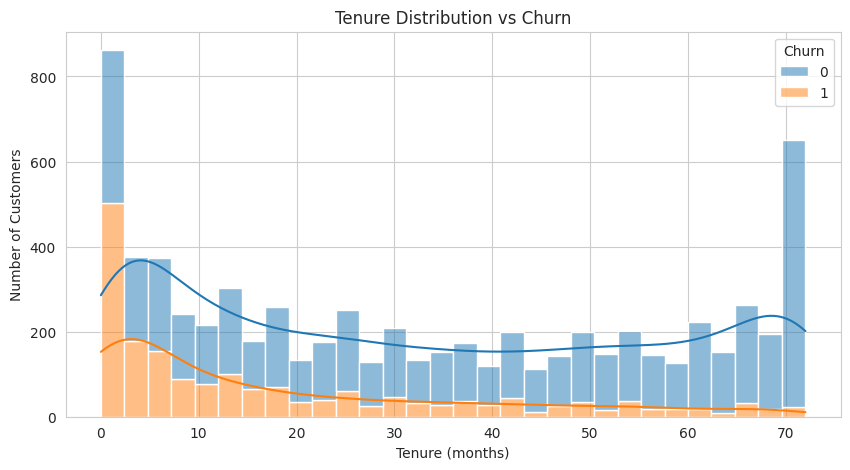

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(
    data=df,
    x='tenure',
    bins=30,
    kde=True,
    hue='Churn',
    multiple='stack'
)
plt.title("Tenure Distribution vs Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


**Churn Across Contract Types and Payment Methods**

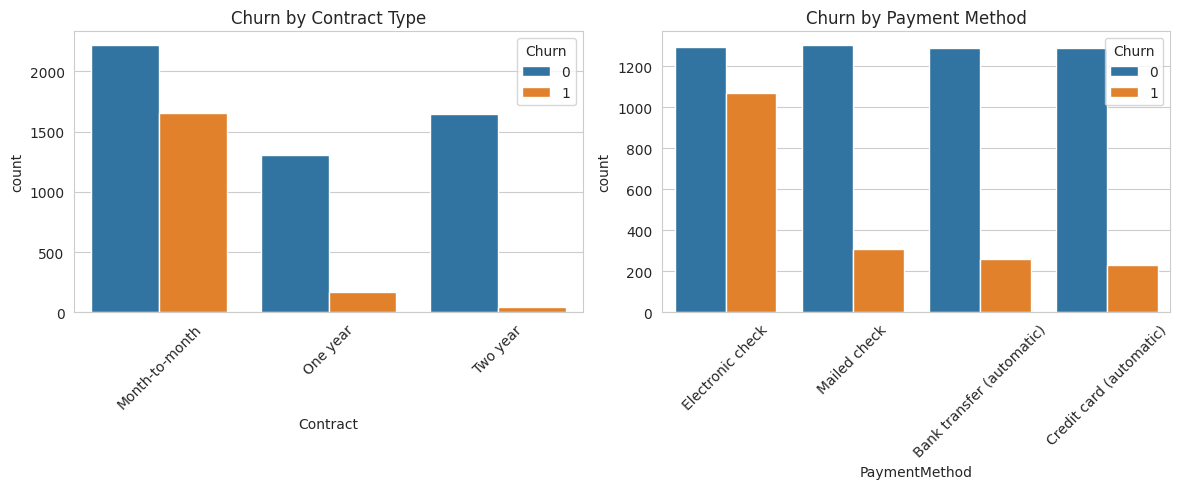

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()